In [1]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:03<00:00, 285MB/s]
100% 812M/812M [00:03<00:00, 261MB/s]


In [7]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('dataset is extracted')

dataset is extracted


In [8]:
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print(' train dataset is extracted')

 train dataset is extracted


In [10]:
import os
path , dirs, files = next(os.walk('/content/train'))

file_count = len(files)
print(file_count, 'number of images')

25000 number of images


In [11]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.2395.jpg', 'dog.325.jpg', 'dog.5168.jpg', 'cat.2129.jpg', 'dog.5384.jpg', 'dog.2181.jpg', 'cat.10581.jpg', 'dog.783.jpg', 'dog.5144.jpg', 'dog.5159.jpg', 'dog.1007.jpg', 'dog.1008.jpg', 'dog.6659.jpg', 'cat.4847.jpg', 'dog.9454.jpg', 'cat.2432.jpg', 'dog.2912.jpg', 'dog.6514.jpg', 'cat.4801.jpg', 'cat.1160.jpg', 'dog.10849.jpg', 'cat.11870.jpg', 'dog.7519.jpg', 'dog.153.jpg', 'cat.7187.jpg', 'cat.8306.jpg', 'dog.11535.jpg', 'dog.4090.jpg', 'dog.3882.jpg', 'cat.251.jpg', 'dog.5226.jpg', 'cat.879.jpg', 'dog.9334.jpg', 'cat.10204.jpg', 'dog.11021.jpg', 'dog.5781.jpg', 'cat.135.jpg', 'dog.1894.jpg', 'cat.6573.jpg', 'cat.11881.jpg', 'cat.2531.jpg', 'dog.6726.jpg', 'dog.11137.jpg', 'cat.9158.jpg', 'dog.11803.jpg', 'cat.4902.jpg', 'cat.6921.jpg', 'cat.2024.jpg', 'cat.9657.jpg', 'cat.11794.jpg', 'dog.11109.jpg', 'cat.3369.jpg', 'cat.9310.jpg', 'cat.365.jpg', 'cat.8702.jpg', 'dog.8595.jpg', 'dog.12061.jpg', 'dog.4081.jpg', 'dog.2393.jpg', 'dog.9876.jpg', 'dog.1364.jpg', 'cat.10632.jpg', '

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

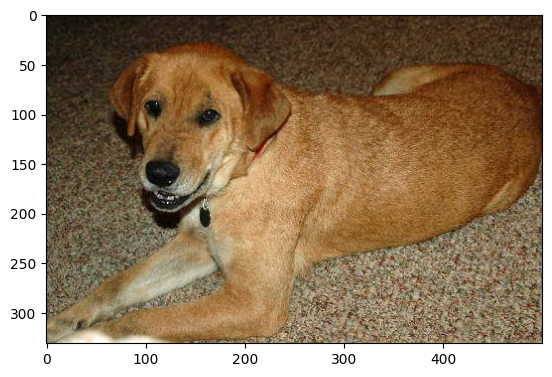

In [22]:
img = mpimg.imread('/content/train/dog.5168.jpg')
plt.imshow(img)

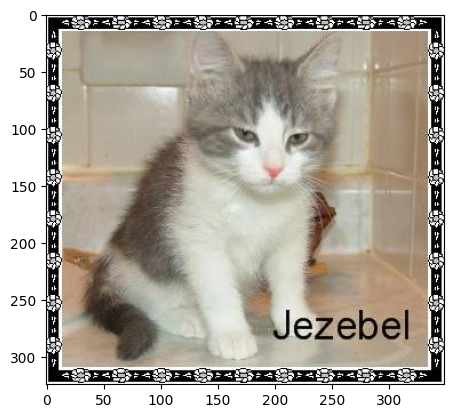

In [21]:
img = mpimg.imread('/content/train/cat.10581.jpg')
plt.imshow(img)

In [23]:
file_names = os.listdir('/content/train')
d_count  = 0
c_count = 0
for file in file_names:
  name = file[0:3]

  if name == 'dog':
    d_count += 1
  else:
    c_count += 1

print(d_count, 'number of dogs')
print(c_count, 'number of cats')

12500 number of dogs
12500 number of cats


In [24]:
os.mkdir('/content/imageresize')

In [25]:
orignal_folder = '/content/train/'
resized_folder = '/content/imageresize/'

for i in range(2000):
  file_name = os.listdir(orignal_folder)[i]
  img_file = orignal_folder + file_name

  img = Image.open(img_file)
  img = img.resize((224,224))
  img = img.convert('RGB')

  new_image_path = resized_folder + file_name
  img.save(new_image_path)


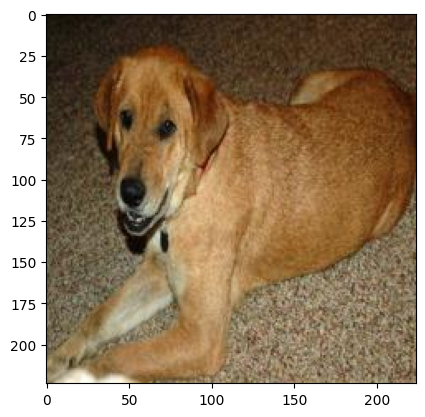

In [26]:
img = mpimg.imread('/content/imageresize/dog.5168.jpg')
plt.imshow(img)

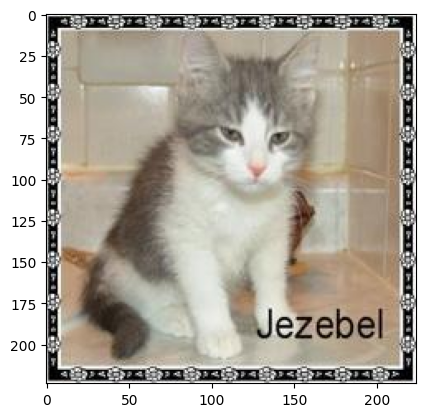

In [27]:
img = mpimg.imread('/content/imageresize/cat.10581.jpg')
plt.imshow(img)

In [28]:
labels = []
file_names = os.listdir('/content/imageresize/')

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [34]:
print(len(labels))
print(len(os.listdir('/content/imageresize')))

2000
2000


In [35]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 989 1011]


In [43]:
import cv2
import glob

In [51]:
image_dir = '/content/imageresize/'
image_extension = ['png', 'jpg']
files = []

[files.extend(glob.glob(image_dir + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [52]:
print(dog_cat_images)

[[[[130 126 131]
   [129 124 133]
   [129 123 140]
   ...
   [226 207 194]
   [228 211 198]
   [226 210 194]]

  [[133 126 141]
   [127 121 140]
   [129 120 146]
   ...
   [226 207 194]
   [228 211 198]
   [226 210 194]]

  [[134 122 158]
   [125 114 152]
   [126 114 156]
   ...
   [226 207 194]
   [228 211 198]
   [226 210 194]]

  ...

  [[238 237 227]
   [246 245 235]
   [251 250 240]
   ...
   [254 255 253]
   [255 253 252]
   [254 252 251]]

  [[241 239 229]
   [245 243 233]
   [247 245 235]
   ...
   [255 254 254]
   [255 252 253]
   [255 251 252]]

  [[251 249 239]
   [251 249 239]
   [247 245 235]
   ...
   [255 254 254]
   [255 252 253]
   [255 251 252]]]


 [[[ 61  97 107]
   [ 76 112 122]
   [ 62  94 107]
   ...
   [ 38  47  67]
   [ 74  81 100]
   [100 107 126]]

  [[ 64 100 110]
   [ 73 109 119]
   [ 66  98 111]
   ...
   [ 59  68  88]
   [ 90 100 118]
   [ 75  85 103]]

  [[ 70 106 116]
   [ 70 106 116]
   [ 69 101 114]
   ...
   [ 57  69  87]
   [ 90 102 120]
   [ 89 101

In [55]:
type(dog_cat_images)

numpy.ndarray

In [56]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [57]:
x, y = dog_cat_images, np.asarray(labels)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [60]:
print(x.shape, x_train.shape, x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [61]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [62]:
print(x_test_scaled[0])

[[[0.10196078 0.09411765 0.0627451 ]
  [0.11372549 0.10588235 0.0745098 ]
  [0.09411765 0.09803922 0.0627451 ]
  ...
  [0.22745098 0.28235294 0.36862745]
  [0.23921569 0.29411765 0.38039216]
  [0.2627451  0.31764706 0.40392157]]

 [[0.11372549 0.10588235 0.0745098 ]
  [0.1254902  0.11764706 0.08627451]
  [0.10980392 0.10196078 0.07058824]
  ...
  [0.21176471 0.26666667 0.35294118]
  [0.21960784 0.2745098  0.36078431]
  [0.23921569 0.29411765 0.38039216]]

 [[0.11764706 0.10588235 0.0745098 ]
  [0.12156863 0.11372549 0.08235294]
  [0.10980392 0.10196078 0.07058824]
  ...
  [0.20784314 0.2627451  0.34901961]
  [0.20784314 0.2627451  0.34901961]
  [0.21960784 0.2745098  0.36078431]]

 ...

 [[0.30196078 0.37647059 0.40784314]
  [0.34117647 0.41568627 0.44705882]
  [0.35686275 0.42745098 0.45490196]
  ...
  [0.65490196 0.88627451 0.80784314]
  [0.21176471 0.53333333 0.4627451 ]
  [0.18823529 0.56078431 0.48235294]]

 [[0.5254902  0.60392157 0.64705882]
  [0.48235294 0.55686275 0.58823529]


In [68]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [64]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [78]:
num_of_classes = 2
pretrained_model_wrapped = keras.layers.Lambda(lambda x: pretrained_model(x))
model = keras.Sequential([
    pretrained_model_wrapped,
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(num_of_classes)
])

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_4 (Lambda)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [81]:
model.fit(x_train_scaled,y_train, epochs= 5)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - acc: 0.9842 - loss: 0.0490
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 49s 983ms/step - acc: 0.9929 - loss: 0.0294
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - acc: 0.9970 - loss: 0.0178
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - acc: 0.9935 - loss: 0.0156
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - acc: 1.0000 - loss: 0.0053


In [82]:
model.summary()

score, acc = model.evaluate(x_test_scaled, y_test)
print('test loss', score)
print('test accuracy', acc)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_4 (Lambda)                    │ (32, 1280)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (32, 16)                    │          20,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (32, 8)                     │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (32, 2)                     │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,952 (242.00 KB)

 Trainable params: 20,650 (80.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,302 (161.34 KB)

13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 916ms/step - acc: 0.9661 - loss: 0.1014
test loss 0.11433932930231094
test accuracy 0.9649999737739563
